## Classificação de animais

In [1]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
'''
Caracteristicas para classificação
Tem pelo curto?
Tem perna loga?
Faz au au?

0 para não
1 para sim
'''
porco_1 = [1, 0, 0]
porco_2 = [0, 1, 0]
porco_3 = [1, 1, 0]

cao_1 = [0, 1, 1]
cao_2 = [1, 1, 1]
cao_3 = [0, 0, 1]

treino_x = [porco_1, porco_2, porco_3, cao_1, cao_2, cao_3]

#1 para porco e 0 para cão
treino_y = [1, 1, 1, 0, 0, 0]

In [3]:
#Treinando um modelo para classificar os animais
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC()

In [4]:
animal_misterioso = [1, 1, 1]
modelo.predict([animal_misterioso])

array([0])

In [5]:
teste_animais = [[1, 1, 1], [1, 1, 0], [0, 1, 1]]
previsoes = modelo.predict(teste_animais)
previsoes

array([0, 1, 0])

In [6]:
teste_classes = [0, 1, 1]
taxa_de_acerto = accuracy_score(teste_classes, previsoes)
print(f"A taxa de acerto é de {taxa_de_acerto * 100:.2f}")

A taxa de acerto é de 66.67


---
## Classificação de compras

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np

In [8]:
url = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(url)

In [9]:
dados

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
94,0,0,1,0
95,1,1,1,1
96,0,0,1,0
97,0,1,0,0


In [10]:
dados.columns.unique()

Index(['home', 'how_it_works', 'contact', 'bought'], dtype='object')

In [11]:
nome_das_colunas = {
    'home': 'principal',
    'how_it_works': 'como_funciona',
    'contact': 'contato',
    'bought': 'comprou' 
}

dados.rename(columns=nome_das_colunas, inplace=True)

In [12]:
dados.columns.unique()

Index(['principal', 'como_funciona', 'contato', 'comprou'], dtype='object')

In [13]:
dados.shape

(99, 4)

In [14]:
x = dados[['principal', 'como_funciona', 'contato']]
y = dados['comprou']

In [15]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

In [16]:
modelo_2 = LinearSVC()
modelo_2.fit(treino_x, treino_y)

LinearSVC()

In [17]:
previsoes_2 = modelo_2.predict(teste_x)
previsoes_2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0])

In [18]:
taxa_de_acerto_2 = accuracy_score(teste_y, previsoes_2)
print(f"A taxa de acerto é de {taxa_de_acerto_2 * 100:.2f}")

A taxa de acerto é de 95.83


* Utilizando a função train_test_split

In [19]:
treino_x1, teste_x1, treino_y1, teste_y1 = train_test_split(x, y, random_state=20, test_size =0.25, stratify=y)

In [20]:
modelo = LinearSVC()
modelo.fit(treino_x1, treino_y1)
previsoes_3 = modelo.predict(teste_x1)

In [21]:
taxa_de_acerto_3 = accuracy_score(teste_y1, previsoes_3)
print(f"A taxa de acerto é de {taxa_de_acerto_3 * 100:.2f}")

A taxa de acerto é de 96.00


In [22]:
treino_y1.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [23]:
teste_y1.value_counts()

0    17
1     8
Name: comprou, dtype: int64

---
## Classificação de preço de profissionais de sites web

In [24]:
url = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
base_dados = pd.read_csv(url)

In [25]:
base_dados

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [26]:
base_dados.columns.unique()

Index(['unfinished', 'expected_hours', 'price'], dtype='object')

In [27]:
renomear_as_colunas = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco'
}
base_dados.rename(columns=renomear_as_colunas, inplace=True)

In [28]:
base_dados.columns.unique()

Index(['nao_finalizado', 'horas_esperadas', 'preco'], dtype='object')

In [29]:
finalizados_dados = {
    0: 1,
    1: 0    
}
base_dados['finalizado'] = base_dados.nao_finalizado.map(finalizados_dados)

In [30]:
base_dados

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


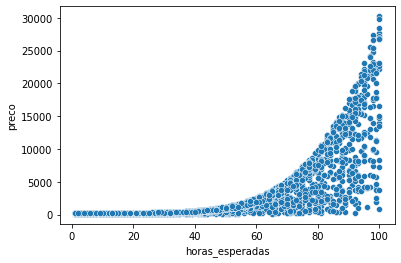

In [31]:
sns.scatterplot(x="horas_esperadas", y="preco", data=base_dados)

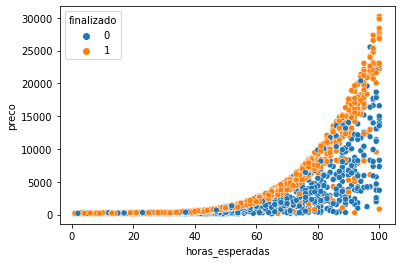

In [32]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=base_dados)

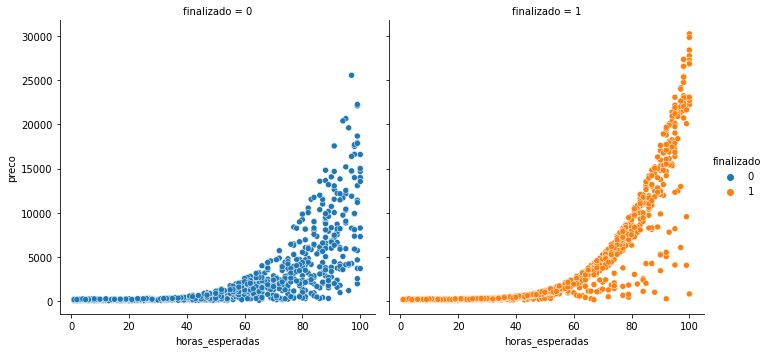

In [33]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", hue="finalizado", data=base_dados)

In [34]:
x2 = base_dados[['horas_esperadas', 'preco']]
y2 = base_dados['finalizado']

In [35]:
treino_x2, teste_x2, treino_y2, teste_y2 = train_test_split(x2, y2, random_state=20, test_size =0.25, stratify=y2)
modelo = LinearSVC()
modelo.fit(treino_x2, treino_y2)
previsoes_4 = modelo.predict(teste_x2)
taxa_de_acerto_4 = accuracy_score(teste_y2, previsoes_4)
print(f"A taxa de acerto é de {taxa_de_acerto_4 * 100:.2f}")

A taxa de acerto é de 48.33


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [36]:
previsoes_amostra = np.ones(540)
acuracia = accuracy_score(teste_y2, previsoes_amostra)
print(f"A taxa de acerto da amostra é de {acuracia * 100:.2f}")

A taxa de acerto da amostra é de 52.59


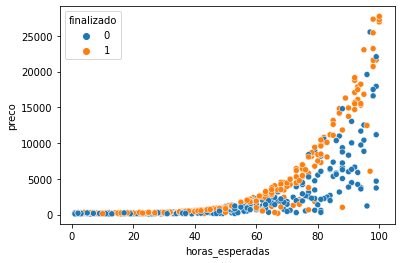

In [37]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y2, data=teste_x2) 